<a href="https://colab.research.google.com/github/vbakomichali/Ai-BuiltEnvironment/blob/main/Copy_of_02_osm_data_VBakomichali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [ ]:
!pip install osmnx geopy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 1.2 MB/s eta 0:00:00


In [ ]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

In [ ]:
PLACE_NAME = "Salamanca, Madrid, Spain"
graph = osmnx.graph_from_place(PLACE_NAME)

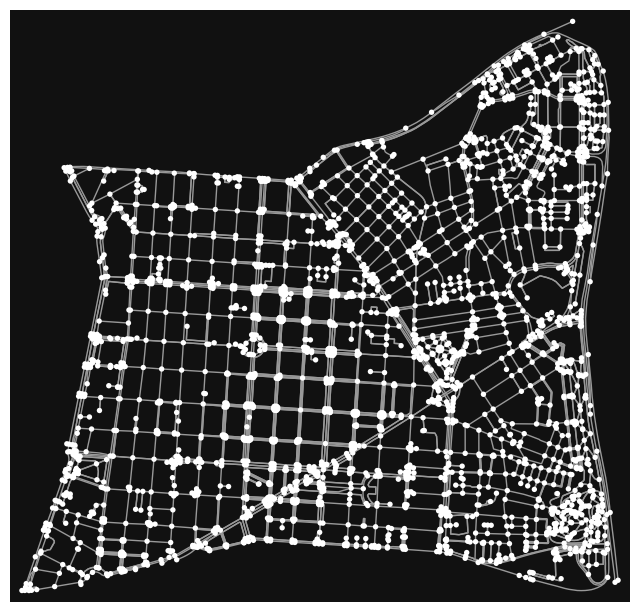

In [ ]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [ ]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-9-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_sp

geometry  \
element_type osmid                                                            
node         4513616734                           POINT (-3.67341 40.43649)   
             4519611544                           POINT (-3.66679 40.43301)   
             10116721615                          POINT (-3.66189 40.42785)   
way          4651595      POLYGON ((-3.68046 40.42818, -3.68020 40.42817...   
             4651596      POLYGON ((-3.68022 40.42803, -3.68032 40.42804...   

                         addr:housenumber             addr:street  \
element_type osmid                                                  
node         4513616734                20  Calle de Agustín Durán   
             4519611544                45  Avenida de los Toreros   
             10116721615               11  Calle de Sancho Dávila   
way          4651595                  NaN                     NaN   
             4651596                  NaN                     NaN   

                         addr:postcode addr:city addr:country  \
element_type osmid                                              
node         4513616734          28028       NaN          NaN   
             4519611544          28028       NaN          NaN   
             10116721615         28028       NaN          NaN   
way          4651595               NaN       NaN          NaN   
             4651596               NaN       NaN          NaN   

                                          source level wheelchair image  ...  \
element_type osmid                                                       ...   
node         4513616734   Ayuntamiento de Madrid   NaN        NaN   NaN  ...   
             4519611544   Ayuntamiento de Madrid   NaN        yes   NaN  ...   
             10116721615                     NaN   NaN        NaN   NaN  ...   
way          4651595                         NaN   NaN        NaN   NaN  ...   
             4651596                         NaN   NaN        NaN   NaN  ...   

                         tower:type route_ref shelter_type abandoned  \
element_type osmid                                                     
node         4513616734         NaN       NaN          NaN       NaN   
             4519611544         NaN       NaN          NaN       NaN   
             10116721615        NaN       NaN          NaN       NaN   
way          4651595            NaN       NaN          NaN       NaN   
             4651596            NaN       NaN          NaN       NaN   

                         source:geometry:date ways type location  \
element_type osmid                                                 
node         4513616734                   NaN  NaN  NaN      NaN   
             4519611544                   NaN  NaN  NaN      NaN   
             10116721615                  NaN  NaN  NaN      NaN   
way          4651595                      NaN  NaN  NaN      NaN   
             4651596                      NaN  NaN  NaN      NaN   

                         payment:american_express product  
element_type osmid                                         
node         4513616734                       NaN     NaN  
             4519611544                       NaN     NaN  
             10116721615                      NaN     NaN  
way          4651595                          NaN     NaN  
             4651596                          NaN     NaN  

[5 rows x 166 columns]

<Axes: >

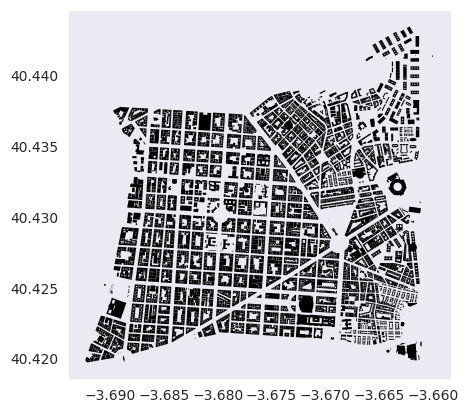

In [ ]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [ ]:
pharmacy = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "pharmacy"
    }
)
pharmacy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-829a6688532d>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pharmacy = osmnx.geometries_from_place(


addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                              
node         993202163     Madrid           ES               56         28028   
             1020485509       NaN          NaN               66         28028   
             1020485511       NaN          NaN                4         28028   
             1020485542       NaN          NaN               36         28028   
             2109912938    Madrid           ES               63         28009   

                                        addr:street   addr:ward   amenity  \
element_type osmid                                                          
node         993202163   Calle de Francisco Silvela  Guindalera  pharmacy   
             1020485509                Calle Azcona  Guindalera  pharmacy   
             1020485511               Calle Brescia  Guindalera  pharmacy   
             1020485542  Calle de Pilar de Zaragoza  Guindalera  pharmacy   
             2109912938          Calle de O'Donnell        Goya  pharmacy   

                         contact:phone  \
element_type osmid                       
node         993202163   +34 913564872   
             1020485509            NaN   
             1020485511  +34 913568351   
             1020485542  +34 917257416   
             2109912938  +34 915746883   

                                                               description  \
element_type osmid                                                           
node         993202163   Acceso: METRO: Diego de Leon, BUS: 12, 56, 72,...   
             1020485509                                                NaN   
             1020485511  Acceso: METRO: Parque Avenidas, BUS: 43, 48, 5...   
             1020485542           Acceso: METRO: Diego de León, BUS: 1, 48   
             2109912938  Acceso: METRO: O'Donnell, BUS: 2, 28, 30, 56, ...   

                        dispensing  ...                       website  \
element_type osmid                  ...                                 
node         993202163         yes  ...                           NaN   
             1020485509        yes  ...                           NaN   
             1020485511        yes  ...  https://farmaciabrescia4.es/   
             1020485542        yes  ...                           NaN   
             2109912938        yes  ...                           NaN   

                        wheelchair contact:facebook email level check_date  \
element_type osmid                                                           
node         993202163         NaN              NaN   NaN   NaN        NaN   
             1020485509        NaN              NaN   NaN   NaN        NaN   
             1020485511        NaN              NaN   NaN   NaN        NaN   
             1020485542        NaN              NaN   NaN   NaN        NaN   
             2109912938        NaN              NaN   NaN   NaN        NaN   

                        check_date:opening_hours opening_hours:signed  \
element_type osmid                                                      
node         993202163                       NaN                  NaN   
             1020485509                      NaN                  NaN   
             1020485511                      NaN                  NaN   
             1020485542                      NaN                  NaN   
             2109912938                      NaN                  NaN   

                        opening_hours  url  
element_type osmid                          
node         993202163            NaN  NaN  
             1020485509           NaN  NaN  
             1020485511           NaN  NaN  
             1020485542           NaN  NaN  
             2109912938           NaN  NaN  

[5 rows x 26 columns]

### 🎢 Putting it all together in one map

In [ ]:
hospital = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "hospital"
    }
)
hospital.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-88877ef934a4>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  hospital = osmnx.geometries_from_place(


addr:housenumber addr:postcode           addr:street  \
element_type osmid                                                             
node         8776264595               16         28009  Avenida de Felipe II   
             8776264596               16         28009  Avenida de Felipe II   
way          29730701                NaN           NaN                   NaN   
             307774527                39           NaN   Calle de Juan Bravo   
             319618224               NaN           NaN                   NaN   

                                                                  geometry  \
element_type osmid                                                           
node         8776264595                          POINT (-3.67396 40.42462)   
             8776264596                          POINT (-3.67505 40.42381)   
way          29730701    POLYGON ((-3.67650 40.43265, -3.67650 40.43271...   
             307774527   POLYGON ((-3.67787 40.43272, -3.67792 40.43272...   
             319618224   POLYGON ((-3.67728 40.43669, -3.67721 40.43673...   

                        addr:city addr:country emergency  \
element_type osmid                                         
node         8776264595    Madrid          NaN       NaN   
             8776264596    Madrid          NaN       NaN   
way          29730701         NaN          NaN       NaN   
             307774527        NaN          NaN       NaN   
             319618224        NaN          NaN       NaN   

                                              name   amenity  \
element_type osmid                                             
node         8776264595    Clínica Madrid Vascular  hospital   
             8776264596    Clínica Madrid Vascular  hospital   
way          29730701     Clínica Ruber Juan Bravo  hospital   
             307774527   Hospital Ruber Juan Bravo  hospital   
             319618224                     Asepeyo  hospital   

                                                               description  \
element_type osmid                                                           
node         8776264595  Clínica Madrid Vascular cuenta con unidad vasc...   
             8776264596  Clínica Madrid Vascular y Médico Estética. Tra...   
way          29730701                                                  NaN   
             307774527                                                 NaN   
             319618224                                                 NaN   

                         ...  building             phone  \
element_type osmid       ...                               
node         8776264595  ...       NaN               NaN   
             8776264596  ...       NaN               NaN   
way          29730701    ...  hospital  +34 910 68 79 99   
             307774527   ...  hospital   +34 914 026 100   
             319618224   ...       yes               NaN   

                                       website wheelchair building:levels  \
element_type osmid                                                          
node         8776264595                    NaN        NaN             NaN   
             8776264596                    NaN        NaN             NaN   
way          29730701    https://www.ruber.es/        yes             NaN   
             307774527   https://www.ruber.es/        yes               8   
             319618224                     NaN        yes             NaN   

                        wikidata ways name:etymology:wikidata type wikipedia  
element_type osmid                                                            
node         8776264595      NaN  NaN                     NaN  NaN       NaN  
             8776264596      NaN  NaN                     NaN  NaN       NaN  
way          29730701        NaN  NaN                     NaN  NaN       NaN  
             307774527       NaN  NaN                     NaN  NaN       NaN  
             319618224       NaN  NaN                     NaN  N

In [ ]:
buildings

geometry  \
element_type osmid                                                            
node         4513616734                           POINT (-3.67341 40.43649)   
             4519611544                           POINT (-3.66679 40.43301)   
             10116721615                          POINT (-3.66189 40.42785)   
way          4651595      POLYGON ((-3.68046 40.42818, -3.68020 40.42817...   
             4651596      POLYGON ((-3.68022 40.42803, -3.68032 40.42804...   
...                                                                     ...   
relation     17313685     POLYGON ((-3.66936 40.43415, -3.66935 40.43413...   
             17313686     POLYGON ((-3.66923 40.43421, -3.66927 40.43419...   
             17313797     POLYGON ((-3.67958 40.43650, -3.67958 40.43655...   
             17323158     POLYGON ((-3.67766 40.42735, -3.67755 40.42734...   
             17323159     POLYGON ((-3.67838 40.42726, -3.67828 40.42726...   

                         addr:housenumber             addr:street  \
element_type osmid                                                  
node         4513616734                20  Calle de Agustín Durán   
             4519611544                45  Avenida de los Toreros   
             10116721615               11  Calle de Sancho Dávila   
way          4651595                  NaN                     NaN   
             4651596                  NaN                     NaN   
...                                   ...                     ...   
relation     17313685                 NaN                     NaN   
             17313686                 NaN                     NaN   
             17313797                 NaN                     NaN   
             17323158                 NaN                     NaN   
             17323159                 NaN                     NaN   

                         addr:postcode addr:city addr:country  \
element_type osmid                                              
node         4513616734          28028       NaN          NaN   
             4519611544          28028       NaN          NaN   
             10116721615         28028       NaN          NaN   
way          4651595               NaN       NaN          NaN   
             4651596               NaN       NaN          NaN   
...                                ...       ...          ...   
relation     17313685              NaN       NaN          NaN   
             17313686              NaN       NaN          NaN   
             17313797              NaN       NaN          NaN   
             17323158              NaN       NaN          NaN   
             17323159              NaN       NaN          NaN   

                                          source level wheelchair image  ...  \
element_type osmid                                                       ...   
node         4513616734   Ayuntamiento de Madrid   NaN        NaN   NaN  ...   
             4519611544   Ayuntamiento de Madrid   NaN        yes   NaN  ...   
             10116721615                     NaN   NaN        NaN   NaN  ...   
way          4651595                         NaN   NaN        NaN   NaN  ...   
             4651596                         NaN   NaN        NaN   NaN  ...   
...                                          ...   ...        ...   ...  ...   
relation     17313685                        NaN   NaN        NaN   NaN  ...   
             17313686                        NaN   NaN        NaN   NaN  ...   
             17313797                        NaN   NaN        NaN   NaN  ...   
             17323158                        NaN   NaN        NaN   NaN  ...   
             17323159                        NaN   NaN        NaN   NaN  ...   

                         tower:type route_ref shelter_type abandoned  \
element_type osmid                                                     
node         4513616734         NaN       NaN          NaN       NaN   
             4519611544         NaN   

In [ ]:

# Assuming `buildings` is your GeoDataFrame containing the buildings data
# Filter out buildings that are represented as points
buildings_polygons = buildings[buildings.geometry.type == 'Polygon']

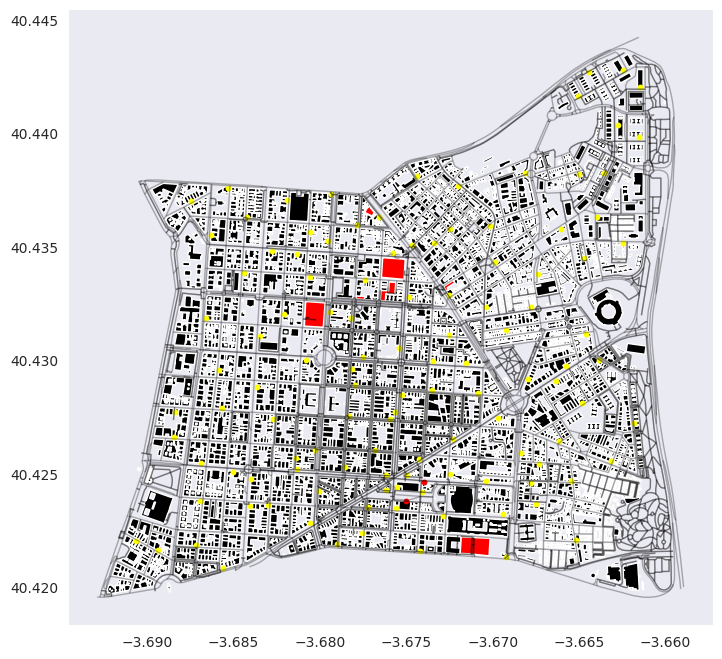

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings_polygons.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
hospital.plot(ax=ax, color="red",facecolor="red", markersize=10)

pharmacy.plot(ax=ax, color="yellow", markersize=10)

plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

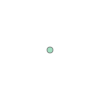

In [ ]:
coords = (-3.6620455186874374, 40.441135814892526)
p = Point(coords)
p


In [ ]:
print(p.x, p.y)

-3.6620455186874374 40.441135814892526


In [ ]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

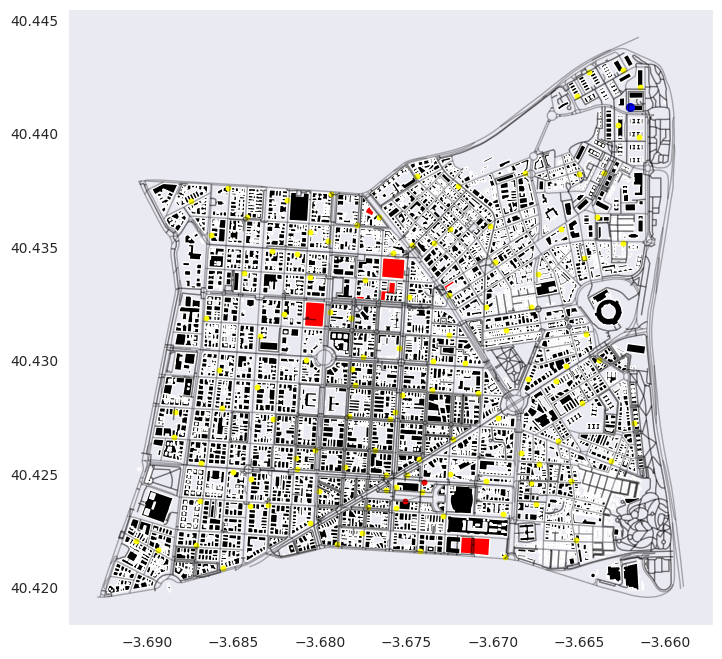

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings_polygons.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
hospital.plot(ax=ax, color="red",facecolor="red", markersize=10)

pharmacy.plot(ax=ax, color="yellow", markersize=10)



# Plot Residence
geom.plot(ax=ax, facecolor="blue", markersize=30)


plt.show()



#### ㊙️ Geocoding: name to coordinates

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [ ]:
rad = p.buffer(0.008 * 0.5)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings_polygons.crs
)

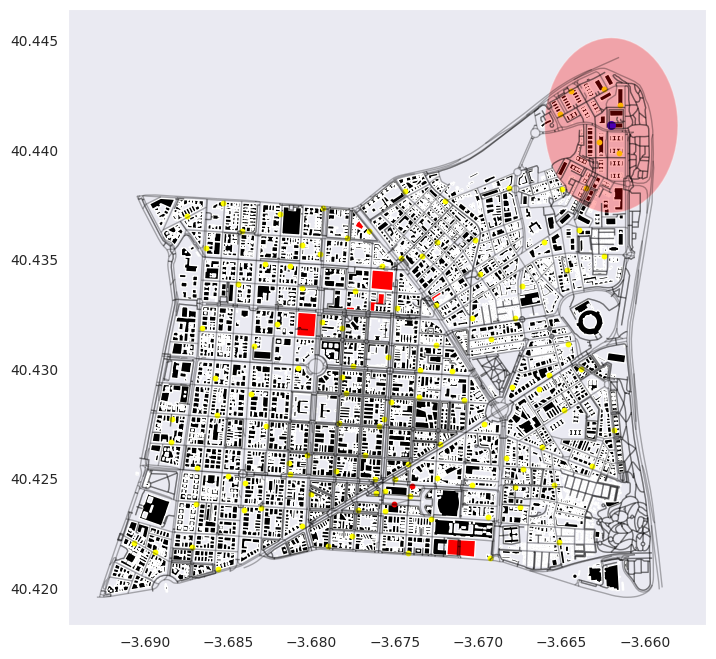

In [ ]:


figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings_polygons.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
hospital.plot(ax=ax, color="red",facecolor="red", markersize=10)

pharmacy.plot(ax=ax, color="yellow", markersize=10)



# Plot Residence
geom.plot(ax=ax, facecolor="blue", markersize=30)


rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

plt.show()


In [ ]:
accessible_pharmacy = [r for r in pharmacy["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]
accessible_pharmacy = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_pharmacy,
    },
    crs=buildings.crs
)

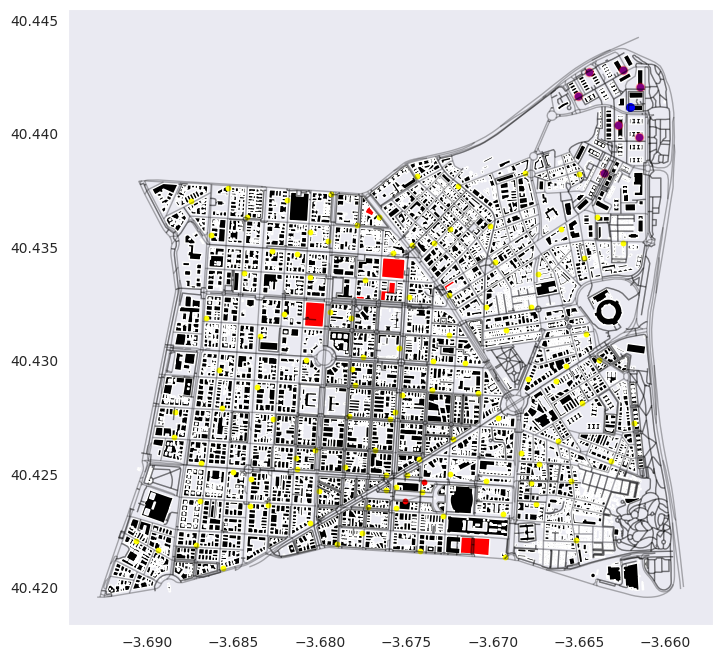

In [ ]:

figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings_polygons.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
hospital.plot(ax=ax, color="red",facecolor="red", markersize=10)

pharmacy.plot(ax=ax, color="yellow", markersize=10)



# Plot Residence
geom.plot(ax=ax, facecolor="blue", markersize=30)


rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

accessible_pharmacy.plot(ax=ax, facecolor="purple", markersize=20, alpha=1.0)

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


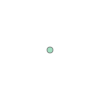

In [ ]:
coords = (-3.6766852798501133, 40.42863400971573)
p2 = Point(coords)
p2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-3.6620455186874374 40.441135814892526


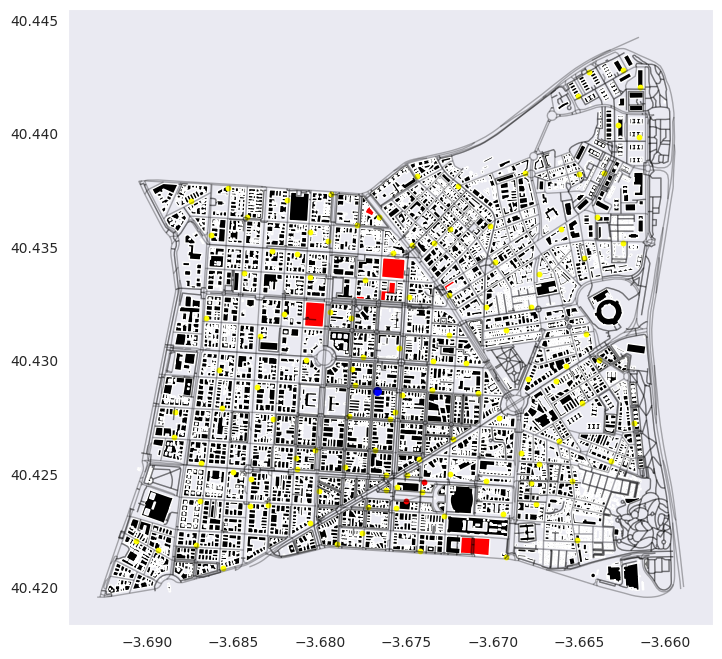

In [ ]:
print(p.x, p.y)

geom2 = geopandas.GeoDataFrame(
    {
        "geometry": [p2],
    },
    crs=edges.crs
)

figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings_polygons.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
hospital.plot(ax=ax, color="red",facecolor="red", markersize=10)

pharmacy.plot(ax=ax, color="yellow", markersize=10)



# Plot Residence
geom2.plot(ax=ax, facecolor="blue", markersize=30)


plt.show()

In [ ]:
rad2 = p2.buffer(0.008 * 0.5)  # making offset of 1.5 km from our point of interest

rad2 = geopandas.GeoDataFrame(
    {
        "geometry": [rad2],
    },
    crs=buildings_polygons.crs
)

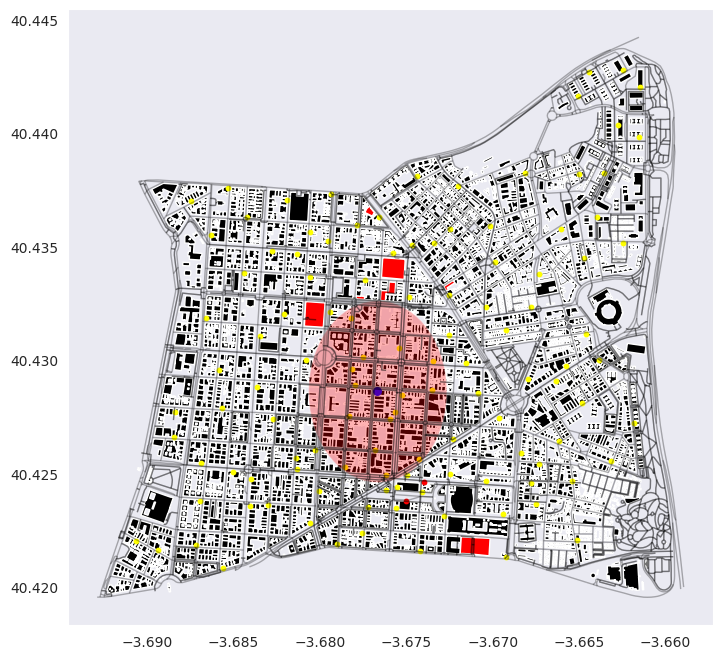

In [ ]:

figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings_polygons.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
hospital.plot(ax=ax, color="red",facecolor="red", markersize=10)

pharmacy.plot(ax=ax, color="yellow", markersize=10)



# Plot Residence
geom2.plot(ax=ax, facecolor="blue", markersize=30)
rad2.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)


plt.show()


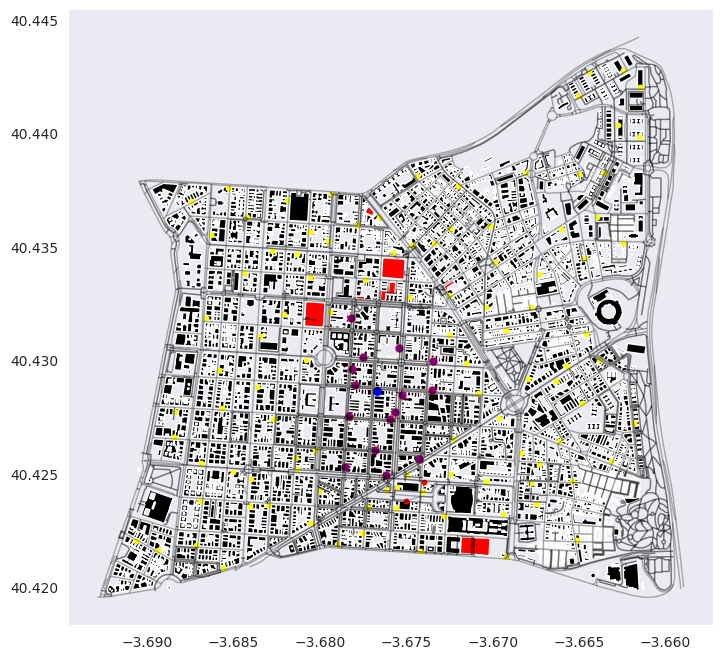

In [ ]:
accessible_pharmacy2 = [r for r in pharmacy["geometry"] if isinstance(r, Point) and r.within(rad2["geometry"][0])]
accessible_pharmacy2 = rad2 = geopandas.GeoDataFrame(
    {
        "geometry": accessible_pharmacy2,
    },
    crs=buildings.crs
)



figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings_polygons.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
hospital.plot(ax=ax, color="red",facecolor="red", markersize=10)

pharmacy.plot(ax=ax, color="yellow", markersize=10)



# Plot Residence
geom2.plot(ax=ax, facecolor="blue", markersize=30)
rad2.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)
accessible_pharmacy2.plot(ax=ax, facecolor="purple", markersize=20, alpha=1.0)

plt.show()


### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

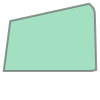

In [ ]:
zone = edges.unary_union.convex_hull
zone

In [ ]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

{'n': 2756,
 'm': 6551,
 'k_avg': 4.753991291727141,
 'edge_length_total': 298512.8349999989,
 'edge_length_avg': 45.56752175240405,
 'streets_per_node_avg': 3.126632801161103,
 'streets_per_node_counts': {0: 0,
  1: 301,
  2: 15,
  3: 1522,
  4: 876,
  5: 36,
  6: 6},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.10921625544267054,
  2: 0.00544267053701016,
  3: 0.5522496371552975,
  4: 0.3178519593613933,
  5: 0.013062409288824383,
  6: 0.0021770682148040637},
 'intersection_count': 2455,
 'street_length_total': 204717.10799999983,
 'street_segment_count': 4239,
 'street_length_avg': 48.29372682236372,
 'circuity_avg': 1.06334650310522,
 'self_loop_proportion': 0.0011795234725171032,
 'node_density_km': 3952332083345.573,
 'intersection_density_km': 3520673172936.641,
 'edge_density_km': 428092109964056.25,
 'street_density_km': 293581275021088.56}

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [ ]:
origin = p

destination = (
    osmnx.geocode_to_gdf("Clínica Ruber Juan Bravo")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)


destination2 = (
    osmnx.geocode_to_gdf("Asepeyo")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

destination3 = (
    osmnx.geocode_to_gdf("Hospital Ruber Juan Bravo")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


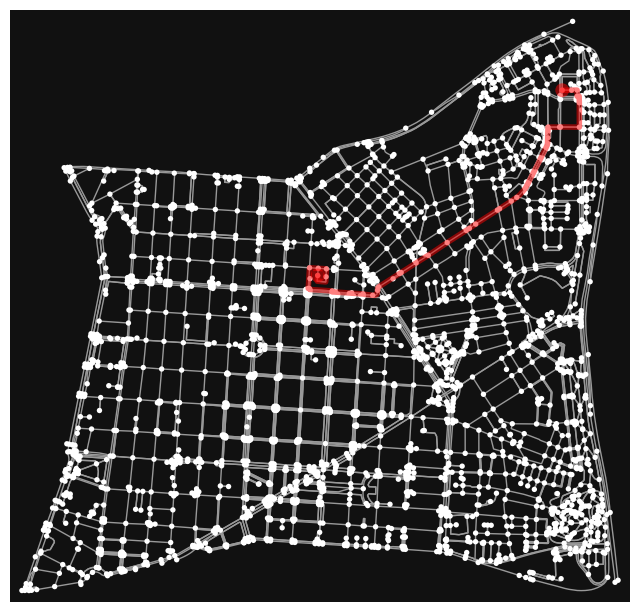

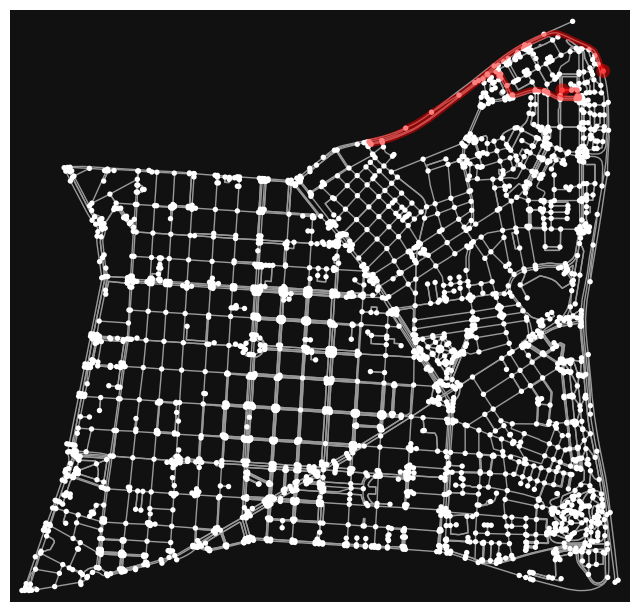

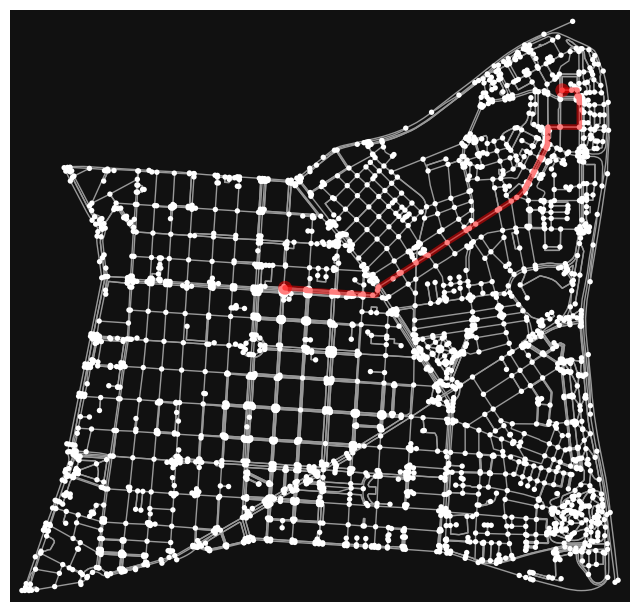

In [ ]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

destination2_node_id = osmnx.nearest_nodes(graph, destination2.x, destination2.y)
destination3_node_id = osmnx.nearest_nodes(graph, destination3.x, destination3.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)


# calculating the shortest path:
route2 = osmnx.shortest_path(graph, origin_node_id, destination2_node_id)

# calculating the shortest path:
route3 = osmnx.shortest_path(graph, origin_node_id, destination3_node_id)

routes = [route, route2, route3]
# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)
fig, ax = osmnx.plot_graph_route(graph, route2)
fig, ax = osmnx.plot_graph_route(graph, route3)

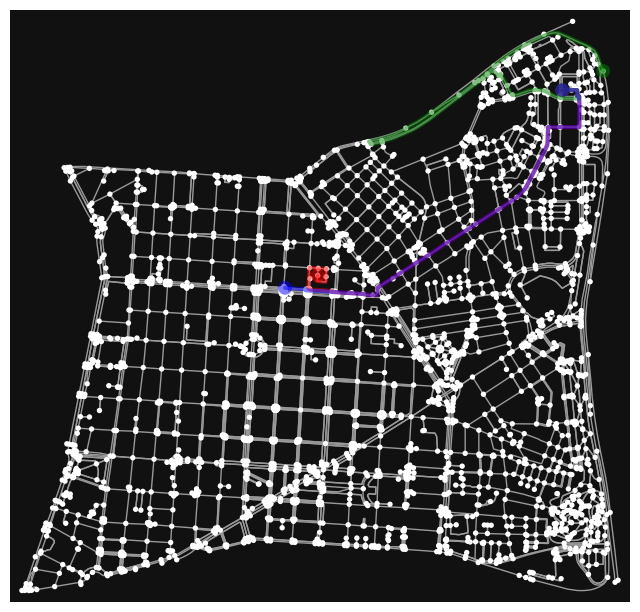

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

destination2_node_id = osmnx.nearest_nodes(graph, destination2.x, destination2.y)
destination3_node_id = osmnx.nearest_nodes(graph, destination3.x, destination3.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)


# calculating the shortest path:
route2 = osmnx.shortest_path(graph, origin_node_id, destination2_node_id)

# calculating the shortest path:
route3 = osmnx.shortest_path(graph, origin_node_id, destination3_node_id)

fig, ax = osmnx.plot_graph(graph, show=False, close=False)

# Plotting the routes on the same map
osmnx.plot_graph_route(graph, route, ax=ax, route_color='r', route_linewidth=3, show=False, close=False)
osmnx.plot_graph_route(graph, route2, ax=ax, route_color='g', route_linewidth=3, show=False, close=False)
osmnx.plot_graph_route(graph, route3, ax=ax, route_color='b', route_linewidth=3, show=True, close=False)

In [ ]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

/tmp/ipykernel_2205/3375068879.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.01473
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

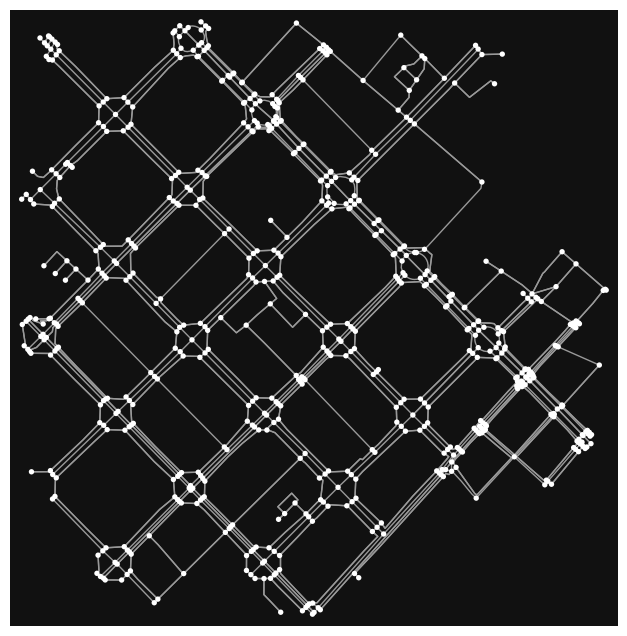

In [ ]:
# getting iaac node from the graph:
iaac_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only:
g = osmnx.truncate.truncate_graph_dist(graph, iaac_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


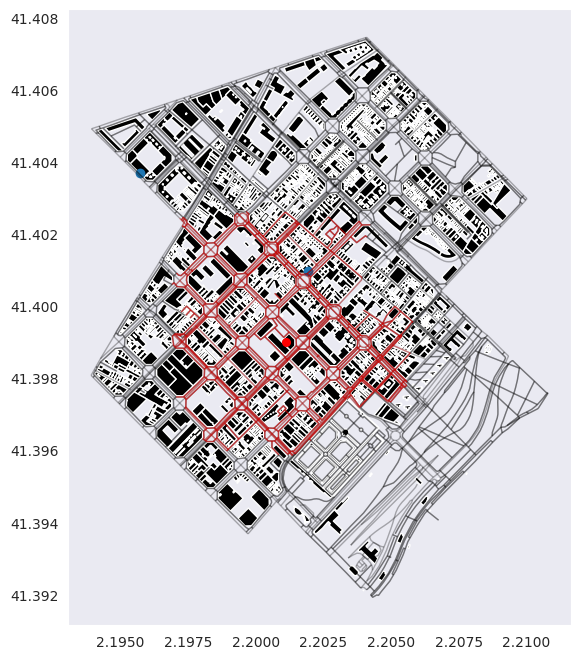

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

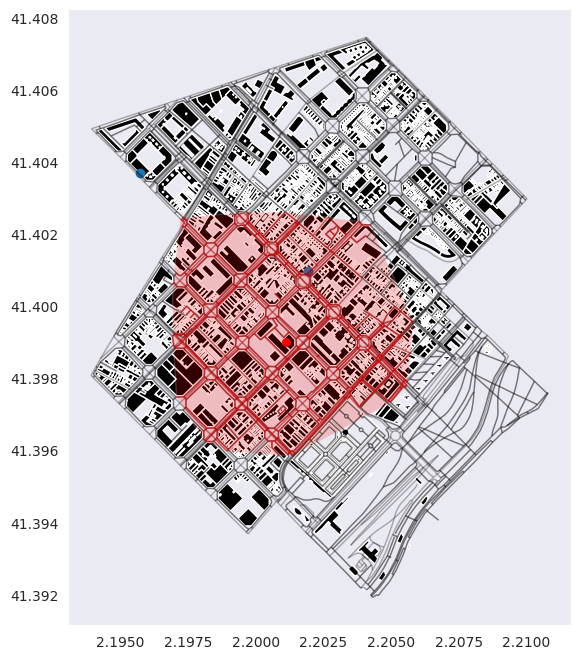

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.